In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'MS Gothic']

play_info = pd.read_csv('play_info.csv', encoding='cp932', on_bad_lines='skip', engine='python')
print(play_info.shape)


(254361, 208)


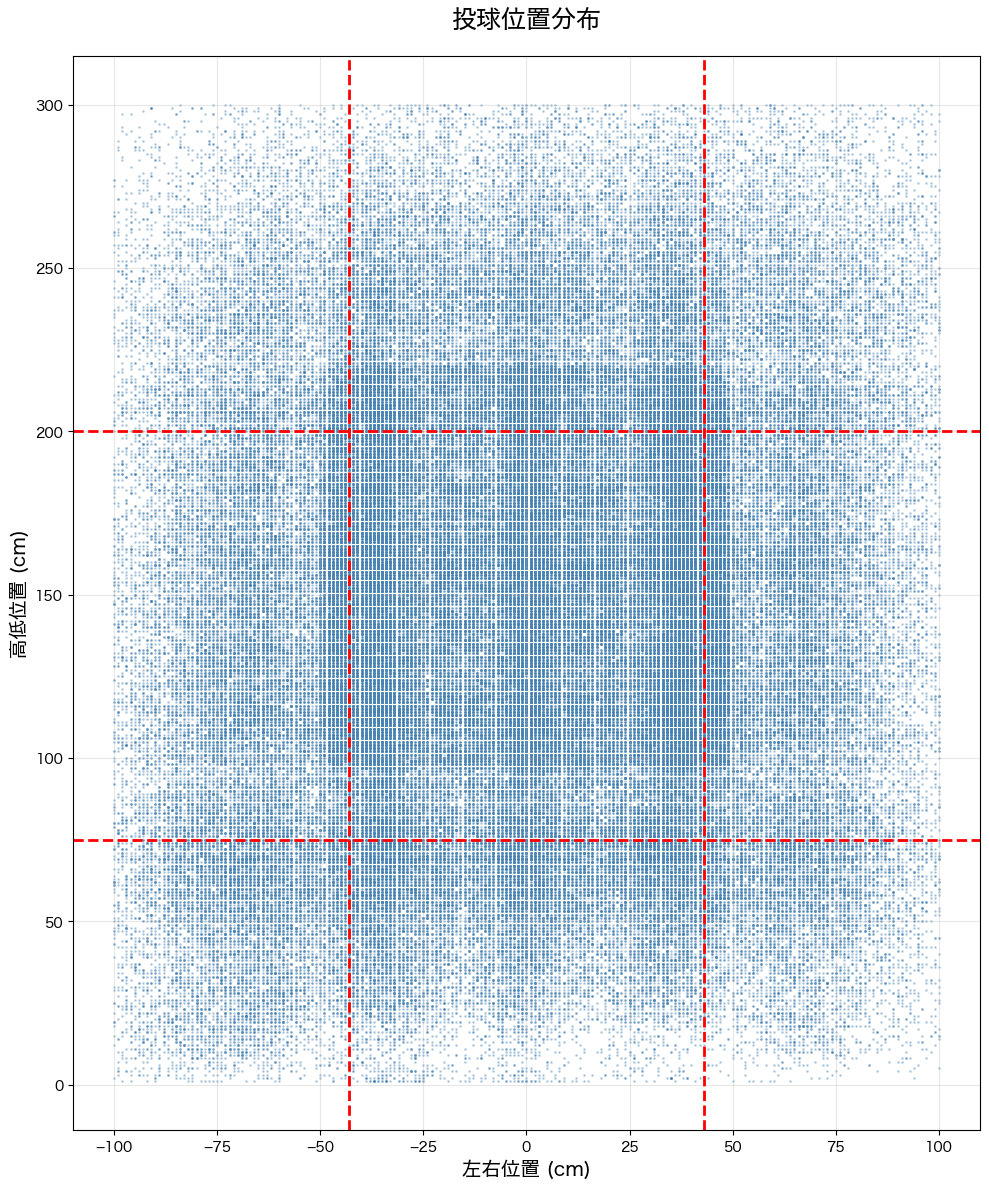

In [3]:
pitch_locations = play_info[['pitch_location_x', 'pitch_location_y', 'pitch_type_name']].dropna()
pitch_locations = pitch_locations[
    (pitch_locations['pitch_location_x'].between(-100, 100)) & 
    (pitch_locations['pitch_location_y'].between(0, 300))
]

plt.figure(figsize=(10,12))
plt.scatter(pitch_locations['pitch_location_x'], pitch_locations['pitch_location_y'], 
            alpha=0.3, s=1, color='steelblue')
plt.axhline(y=75, color='red', linestyle='--', linewidth=2)
plt.axhline(y=200, color='red', linestyle='--', linewidth=2)
plt.axvline(x=-43, color='red', linestyle='--', linewidth=2)
plt.axvline(x=43, color='red', linestyle='--', linewidth=2)
plt.title('投球位置分布', fontsize=18, pad=20)
plt.xlabel('左右位置 (cm)', fontsize=14)
plt.ylabel('高低位置 (cm)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


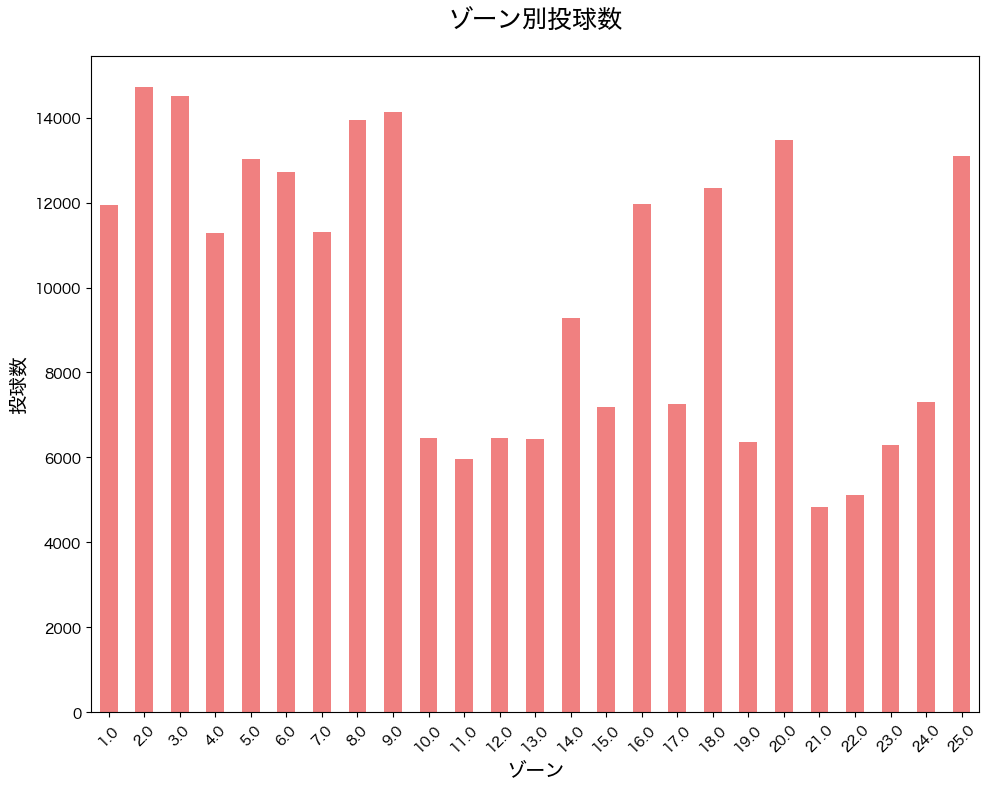

pitch_zone
1.0     11948
2.0     14718
3.0     14507
4.0     11273
5.0     13025
6.0     12725
7.0     11305
8.0     13948
9.0     14127
10.0     6455
11.0     5960
12.0     6463
13.0     6433
14.0     9277
15.0     7188
16.0    11976
17.0     7251
18.0    12339
19.0     6372
20.0    13471
21.0     4824
22.0     5127
23.0     6288
24.0     7297
25.0    13084
Name: count, dtype: int64


In [4]:
zone_count = play_info['pitch_zone'].value_counts().sort_index()

plt.figure(figsize=(10,8))
zone_count.plot(kind='bar', color='lightcoral')
plt.title('ゾーン別投球数', fontsize=18, pad=20)
plt.xlabel('ゾーン', fontsize=14)
plt.ylabel('投球数', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(zone_count)


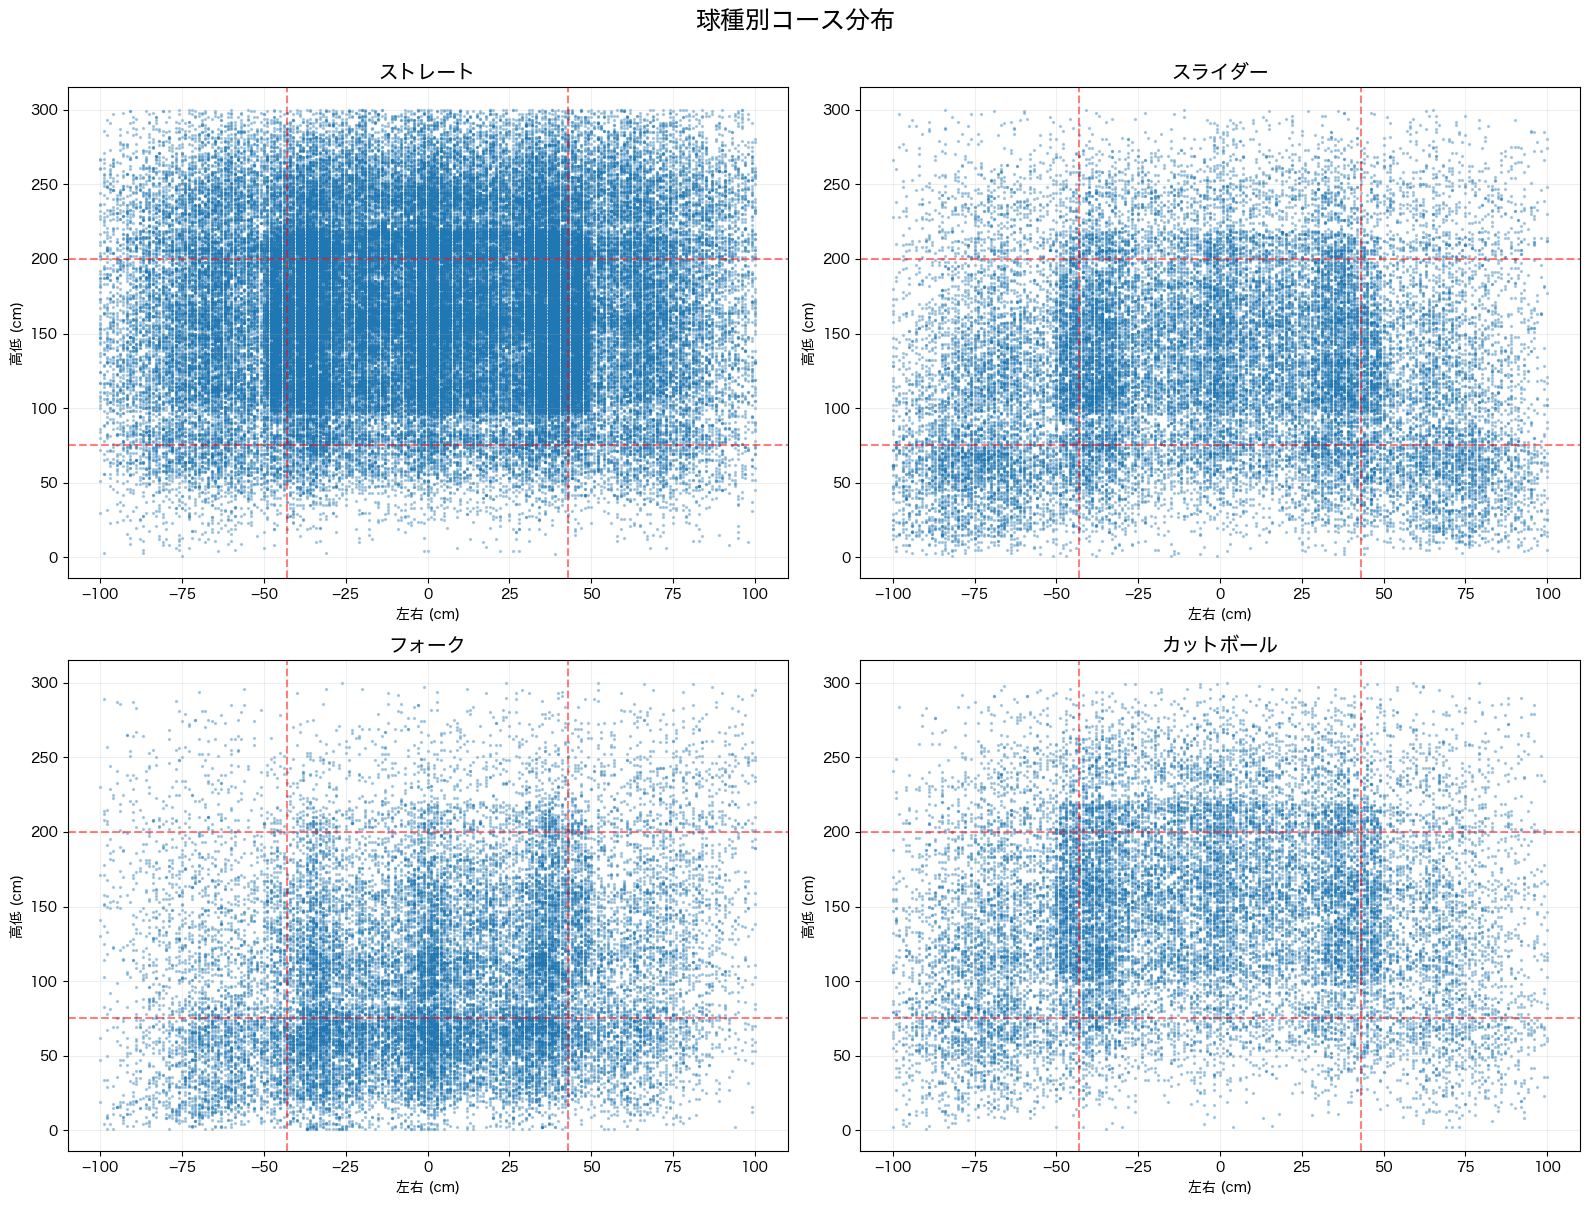

In [5]:
top_pitches = play_info['pitch_type_name'].value_counts().head(4).index

plt.figure(figsize=(16,12))
for i, pitch in enumerate(top_pitches, 1):
    plt.subplot(2, 2, i)
    pitch_subset = play_info[play_info['pitch_type_name'] == pitch]
    pitch_subset = pitch_subset[
        (pitch_subset['pitch_location_x'].between(-100, 100)) & 
        (pitch_subset['pitch_location_y'].between(0, 300))
    ]
    plt.scatter(pitch_subset['pitch_location_x'], pitch_subset['pitch_location_y'], 
                alpha=0.3, s=2)
    plt.axhline(y=75, color='red', linestyle='--', alpha=0.5)
    plt.axhline(y=200, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=-43, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=43, color='red', linestyle='--', alpha=0.5)
    plt.title(f'{pitch}', fontsize=14)
    plt.xlabel('左右 (cm)', fontsize=10)
    plt.ylabel('高低 (cm)', fontsize=10)
    plt.grid(True, alpha=0.2)

plt.suptitle('球種別コース分布', fontsize=18, y=1.00)
plt.tight_layout()
plt.show()


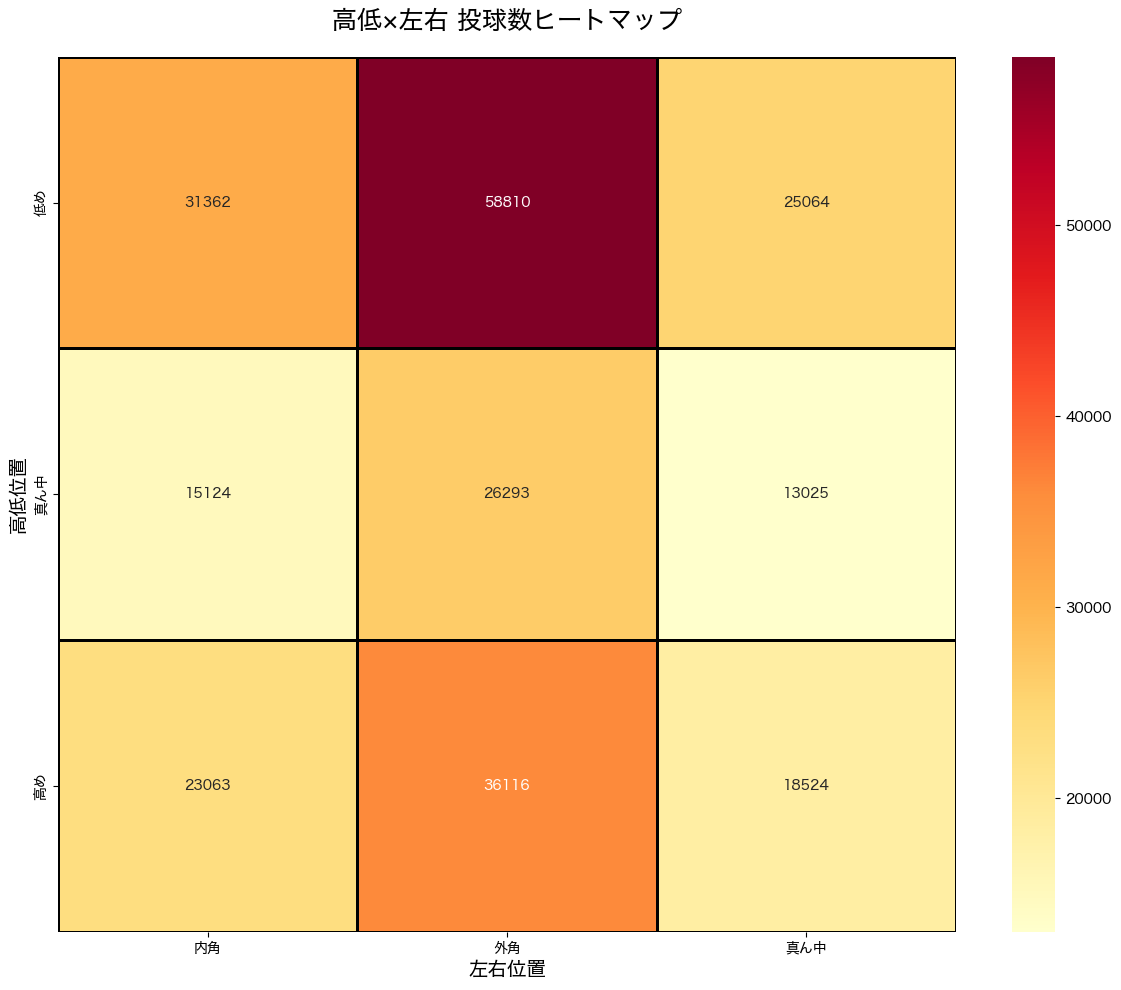

In [6]:
pitch_data = play_info[['pitch_location_x', 'pitch_location_y', 'pitch_zone_side', 'pitch_zone_height']].dropna()

zone_stats = pitch_data.groupby(['pitch_zone_height', 'pitch_zone_side']).size().unstack(fill_value=0)

plt.figure(figsize=(12,10))
sns.heatmap(zone_stats, annot=True, fmt='d', cmap='YlOrRd', linewidths=1, linecolor='black')
plt.title('高低×左右 投球数ヒートマップ', fontsize=18, pad=20)
plt.xlabel('左右位置', fontsize=14)
plt.ylabel('高低位置', fontsize=14)
plt.tight_layout()
plt.show()


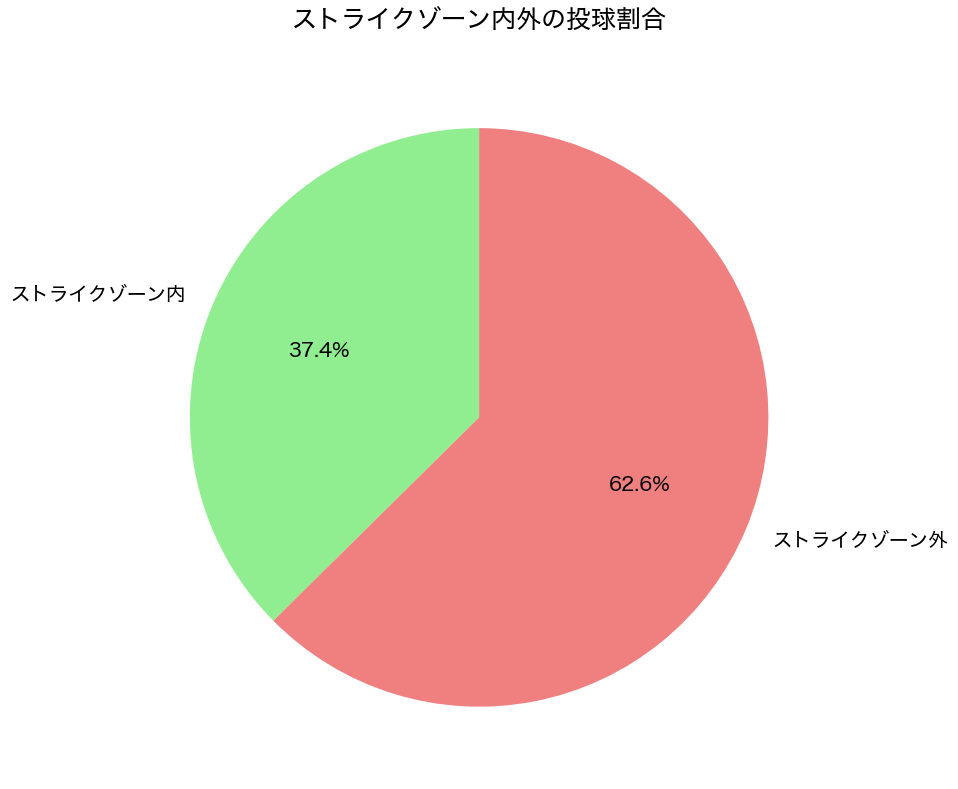

ストライクゾーン内: 95,143球
ストライクゾーン外: 159,218球


In [7]:
strike_zone_pitches = play_info[
    (play_info['pitch_location_x'].between(-43, 43)) & 
    (play_info['pitch_location_y'].between(75, 200))
]

outside_zone_pitches = play_info[
    ~((play_info['pitch_location_x'].between(-43, 43)) & 
      (play_info['pitch_location_y'].between(75, 200)))
]

labels = ['ストライクゾーン内', 'ストライクゾーン外']
sizes = [len(strike_zone_pitches), len(outside_zone_pitches)]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('ストライクゾーン内外の投球割合', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

print(f"ストライクゾーン内: {len(strike_zone_pitches):,}球")
print(f"ストライクゾーン外: {len(outside_zone_pitches):,}球")
